<a href="https://colab.research.google.com/github/jcjr64/CIND820/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas pdfplumber beautifulsoup4 requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 840.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 53.8 MB/s eta 0:00:00


In [2]:
pip install pandas PyPDF2 nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.1 MB/s eta 0:00:00


In [3]:
import pdfplumber
import pandas as pd
import glob
import re
from dateutil.parser import parse

In [4]:
import os
import pandas as pd
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
pip install pandas pdfplumber beautifulsoup4 requests

In [6]:
import pdfplumber
import pandas as pd
import glob
import re
from dateutil.parser import parse

In [7]:
#Loading the Loughran-McDonald Master Dictionary

lm_dict = pd.read_csv('/content/Dict/Loughran-McDonald_MasterDictionary_1993-2021 (1).csv')
positive_words = lm_dict[lm_dict['Positive'] > 0]['Word'].str.lower().tolist()
negative_words = lm_dict[lm_dict['Negative'] > 0]['Word'].str.lower().tolist()

In [8]:
def extract_date_from_filename(file_name):
    date_pattern = '\d{4}-\d{2}-\d{2}'  # Adjust based on your file naming convention
    match = re.search(date_pattern, file_name)
    if match:
        return parse(match.group(0)).date()
    return None

In [9]:
def parse_pdf(file_path):
    text = ''
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ''
    return text

In [10]:
def analyze_sentiment(text):
    words = text.lower().split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count  # Simple sentiment score: positive - negative

In [11]:
def process_pdfs_in_directory(directory_path):
    results = []

    for file_path in glob.glob(f"{directory_path}/*.pdf"):
        file_name = file_path.split('/')[-1]
        date = extract_date_from_filename(file_name)
        text = parse_pdf(file_path)
        sentiment_score = analyze_sentiment(text)

        results.append({
            'file_name': file_name,
            'date': date,
            'sentiment_score': sentiment_score,
            'average_sentiment_score': sentiment_score  # Since we're treating the entire PDF as a single unit
        })

    return results

In [12]:
pdf_directory = '/content/SECdated'  # Replace with the actual path to your PDF files
pdf_results = process_pdfs_in_directory(pdf_directory)

# Display the results
for result in pdf_results:
    print(f"File: {result['file_name']}, Date: {result['date']}, Average Sentiment Score: {result['average_sentiment_score']}")

File: 2024-01-29.pdf, Date: 2024-01-29, Average Sentiment Score: -125
File: 2022-12-14.pdf, Date: 2022-12-14, Average Sentiment Score: -188
File: 2022-08-09.pdf, Date: 2022-08-09, Average Sentiment Score: -110
File: 2019-06-05.pdf, Date: 2019-06-05, Average Sentiment Score: -81
File: 2019-02-20.pdf, Date: 2019-02-20, Average Sentiment Score: -31
File: 2022-09-29.pdf, Date: 2022-09-29, Average Sentiment Score: -116
File: 2019-06-04.pdf, Date: 2019-06-04, Average Sentiment Score: -19
File: 2020-02-27.pdf, Date: 2020-02-27, Average Sentiment Score: -50
File: 2015-12-01.pdf, Date: 2015-12-01, Average Sentiment Score: -111
File: 2019-05-14.pdf, Date: 2019-05-14, Average Sentiment Score: -32
File: 2020-12-22.pdf, Date: 2020-12-22, Average Sentiment Score: -114
File: 2022-02-14.pdf, Date: 2022-02-14, Average Sentiment Score: -60
File: 2015-06-17.pdf, Date: 2015-06-17, Average Sentiment Score: -39
File: 2021-12-02.pdf, Date: 2021-12-02, Average Sentiment Score: -138
File: 2021-09-08.pdf, Date:

In [ ]:
!pip install pandas pdfplumber beautifulsoup4 requests numpy matplotlib statsmodels


In [15]:
import pandas as pd

# Load Bitcoin prices
btc_prices = pd.read_csv('/content/BTC-USD/BTC-USD (1).csv', usecols=['Date', 'Close'], parse_dates=['Date'])
btc_prices.set_index('Date', inplace=True)

In [16]:
# Convert PDF sentiment results to DataFrame
pdf_sentiments = pd.DataFrame(pdf_results)
pdf_sentiments['date'] = pd.to_datetime(pdf_sentiments['date'])  # Ensure 'date' is datetime type
pdf_sentiments.set_index('date', inplace=True)

# Merge sentiment scores with Bitcoin prices
merged_data = btc_prices.join(pdf_sentiments['average_sentiment_score']).fillna(0)  # Fill missing sentiment scores with 0

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'merged_data' contains the merged sentiment scores and Bitcoin prices

# Select the column for modeling (e.g., 'Close' for Bitcoin closing prices)
series = merged_data['Close']

# Split data into training and test sets
split_point = int(len(series) * 0.8)
train, test = series[0:split_point], series[split_point:]

# Define and fit the ARIMA model (you may need to adjust p, d, q values)
model = ARIMA(train, order=(5,1,0))  # Example order, adjust based on your data
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2767
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -22383.662
Date:                Sun, 10 Mar 2024   AIC                          44779.324
Time:                        16:55:41   BIC                          44814.875
Sample:                             0   HQIC                         44792.165
                               - 2767                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0225      0.010     -2.308      0.021      -0.042      -0.003
ar.L2         -0.0034      0.009     -0.368      0.713      -0.021       0.015
ar.L3          0.0116      0.010      1.155      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


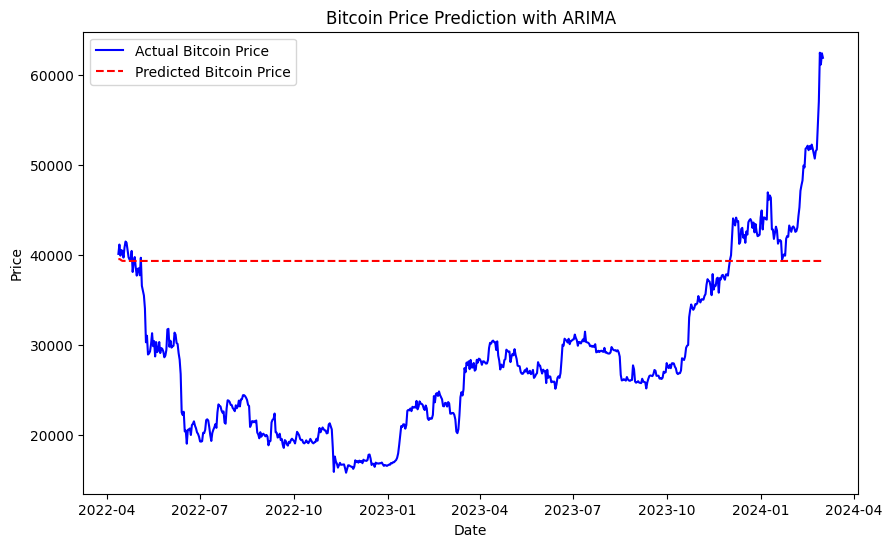

In [18]:
# Forecast
forecasts = model_fit.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, color='blue', label='Actual Bitcoin Price')
plt.plot(test.index, forecasts, color='red', linestyle='dashed', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


ADF Statistic: -0.516595
p-value: 0.888737
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


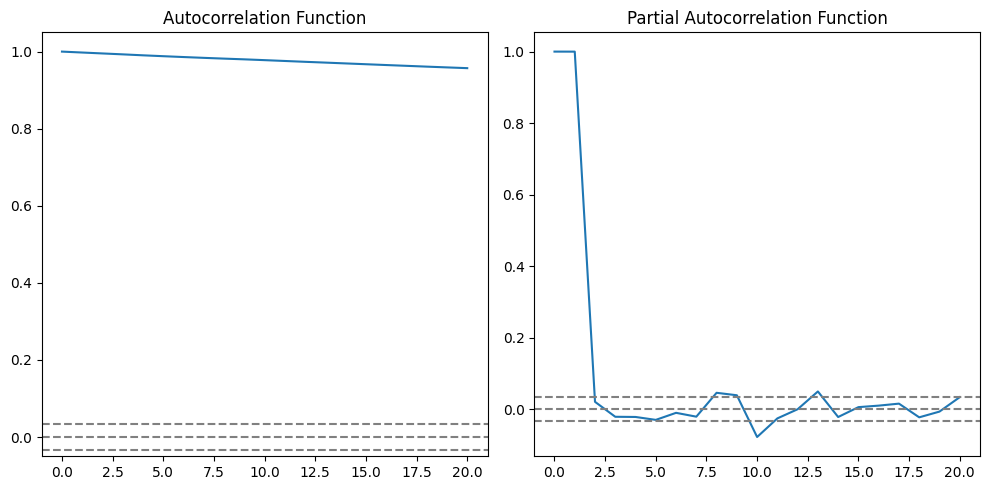

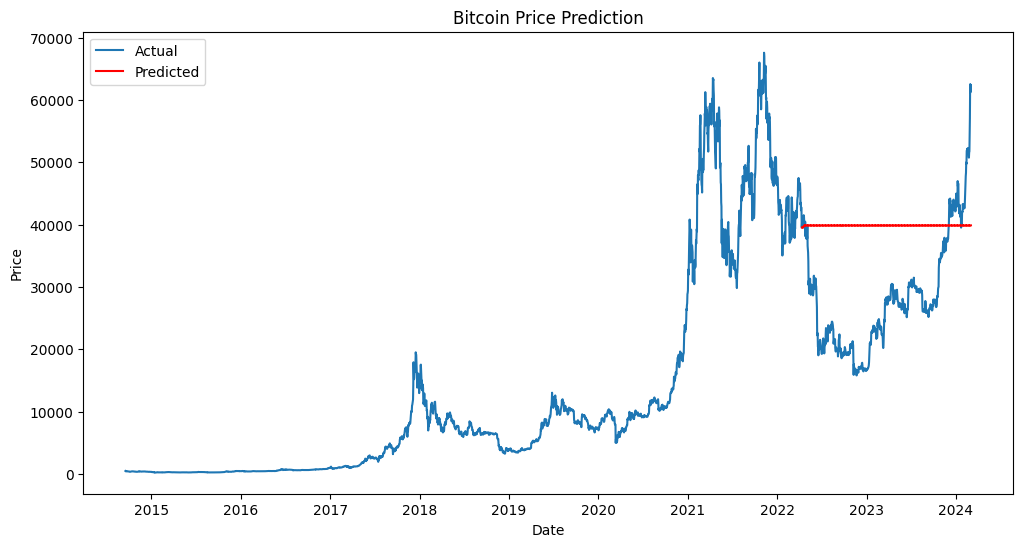

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
import matplotlib.pyplot as plt
import numpy as np

# Function to test stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Assuming 'merged_data' is defined and contains 'Close' prices and sentiment scores
series = merged_data['Close']

# Check stationarity
test_stationarity(series)

# Determine d value using ADF test (d=0 if stationary, d=1 if needs differencing)
# Adjust d based on the ADF test result

# Determine p and q using ACF and PACF plots
lag_acf = acf(series, nlags=20)
lag_pacf = pacf(series, nlags=20, method='ols')

# Plot ACF and PACF
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Based on ACF and PACF, choose p, d, q values
p = 1  # Example, adjust based on PACF
d = 0  # Example, adjust based on stationarity test
q = 1  # Example, adjust based on ACF

# Fit SARIMA model (if seasonality detected, else use ARIMA)
model = SARIMAX(series, order=(p, d, q), seasonal_order=(1, 1, 1, 12))  # Example orders, adjust as necessary
model_fit = model.fit(disp=False)

# Dynamic predictions
dynamic_predictions = model_fit.predict(start=split_point, end=len(series)-1, dynamic=True)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(series.index, series, label='Actual')
plt.plot(dynamic_predictions.index, dynamic_predictions, label='Predicted', color='red')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
